# Importing and cleaning the dataset

In [61]:
#importing libraries
import pandas as pd
from matplotlib import rcParams

In [62]:
#import working dataset
df = pd.read_csv("imdb_top_1000.csv")

In [63]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [65]:
# Handle Missing Values
print(df.isnull().sum())  # Check for missing values

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [66]:
df = df.dropna() #drop missing values

In [67]:
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [68]:
# Check for Duplicates
print("Number of duplicate rows:", df.duplicated().sum())  # Check for duplicates
df = df.drop_duplicates()  # Remove duplicates

Number of duplicate rows: 0


In [69]:
# Convert 'Released_Year' to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Convert 'Runtime' to numeric (extracting numeric part from string)
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(float)

# Convert 'Gross' to numeric after removing non-numeric characters
df['Gross'] = df['Gross'].str.replace('[^\d.]', '', regex=True).astype(float)

In [70]:
print (df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year    float64
Certificate       object
Runtime          float64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object


# EDA

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df.value_counts()

Poster_Link                                                                                                                                                        Series_Title             Released_Year  Certificate  Runtime  Genre                         IMDB_Rating  Overview                                                                                                                                                                                                                            Meta_score  Director              Star1                 Star2              Star3                  Star4                       No_of_Votes  Gross      
https://m.media-amazon.com/images/M/MV5BM2FhYjEyYmYtMDI1Yy00YTdlLWI2NWQtYmEzNzAxOGY1NjY2XkEyXkFqcGdeQXVyNTA3NTIyNDg@._V1_UX67_CR0,0,67,98_AL_.jpg                  Nuovo Cinema Paradiso    1988.0         U            155.0    Drama, Romance                8.5          A filmmaker recalls his childhood when falling in love with the pictures at the cinem

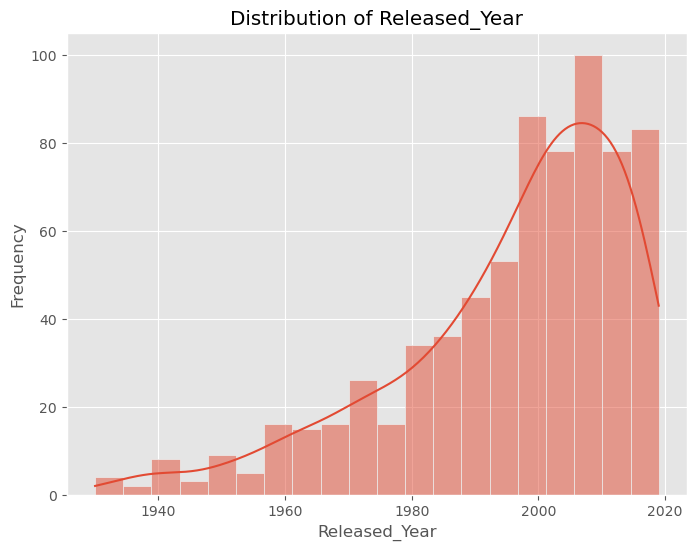

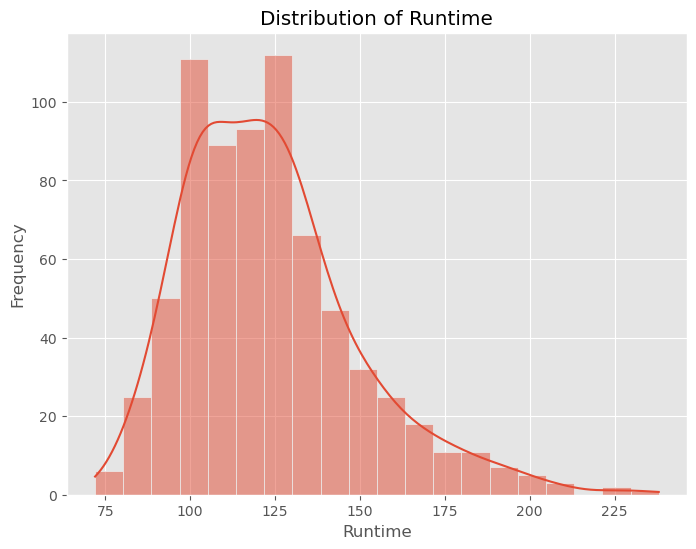

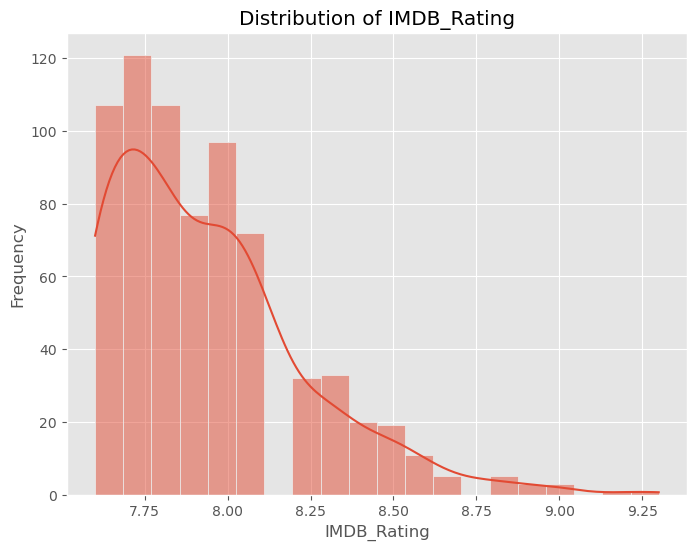

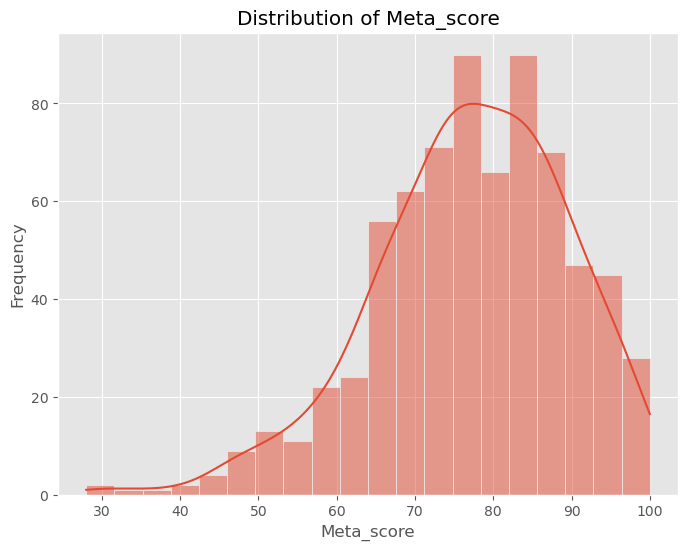

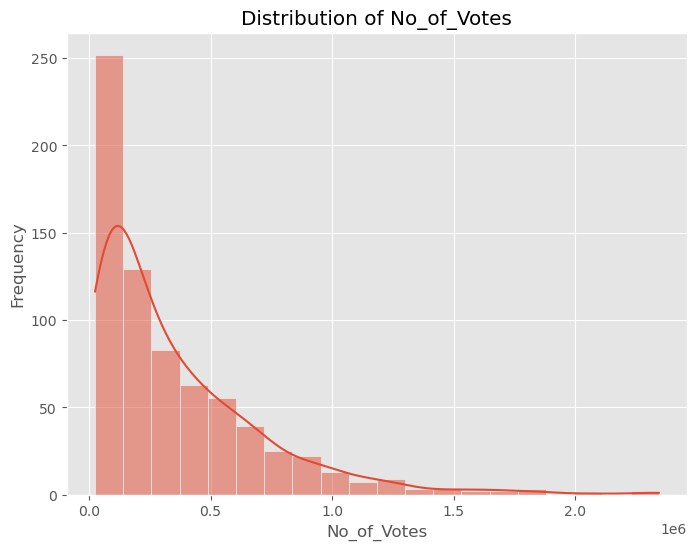

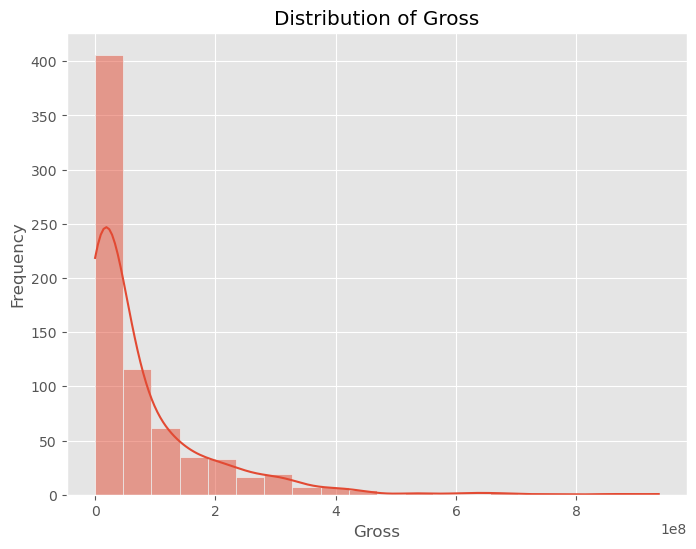

In [77]:
columns = df.columns
for col in columns:
    # Skip analysis on non-numeric columns
    if df[col].dtype not in ['int64', 'float64']:
        continue
    
    # Plot histogram for numeric columns
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [79]:
print(df.describe())

       Released_Year     Runtime  IMDB_Rating  Meta_score   No_of_Votes  \
count     713.000000  714.000000   714.000000  714.000000  7.140000e+02   
mean     1995.736325  123.715686     7.937115   77.158263  3.561348e+05   
std        18.598222   25.887535     0.293278   12.401144  3.539011e+05   
min      1930.000000   72.000000     7.600000   28.000000  2.522900e+04   
25%      1987.000000  104.250000     7.700000   70.000000  9.600975e+04   
50%      2001.000000  120.000000     7.900000   78.000000  2.366025e+05   
75%      2010.000000  136.000000     8.100000   86.000000  5.077922e+05   
max      2019.000000  238.000000     9.300000  100.000000  2.343110e+06   

              Gross  
count  7.140000e+02  
mean   7.851359e+07  
std    1.149780e+08  
min    1.305000e+03  
25%    6.157408e+06  
50%    3.485015e+07  
75%    1.024641e+08  
max    9.366622e+08  


In [80]:
print(df.isnull().sum())

Poster_Link      0
Series_Title     0
Released_Year    1
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64
